# Lecture 6
- Introduction to Random Variables 
- Discrete Random Variables
- Important discrete RVs:

In [2]:
import random
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

# Discrete RVs in Python

The module ```stats``` from the library **SciPy** (pronounced "Sigh Pie") contains a large number of probability distributions as well as a growing library of statistical functions.

* ```scipy```'s API: https://docs.scipy.org/doc/scipy/reference/stats.html

* If you install Python 3+ through [Anaconda](https://www.anaconda.com/distribution/) then you already have installed the library ```scipy```.

In [3]:
import scipy.stats as stats

**<font color=blue>Example 1</font> Let's implement the discrete RV $X$ for ``the number of heads in two tosses of a fair coin)'':**

In [4]:
vals = [0, 1, 2]
probs =[1/4, 1/2, 1/4]

In [7]:
#?stats.rv_discrete
X = stats.rv_discrete(values = (vals, probs))
X

In [8]:
?stats.rv_discrete

Init signature:
stats.rv_discrete(
    a=0,
    b=inf,
    name=None,
    badvalue=None,
    moment_tol=1e-08,
    values=None,
    inc=1,
    longname=None,
    shapes=None,
    extradoc=None,
    seed=None,
)
Docstring:     
A generic discrete random variable class meant for subclassing.

`rv_discrete` is a base class to construct specific distribution classes
and instances for discrete random variables. It can also be used
to construct an arbitrary distribution defined by a list of support
points and corresponding probabilities.

Parameters
----------
a : float, optional
    Lower bound of the support of the distribution, default: 0
b : float, optional
    Upper bound of the support of the distribution, default: plus infinity
moment_tol : float, optional
    The tolerance for the generic calculation of moments.
values : tuple of two array_like, optional
    ``(xk, pk)`` where ``xk`` are integers and ``pk`` are the non-zero
    probabilities between 0 and 1 with ``sum(pk) = 1``. ``xk

Now, we can compute and plot the **PMF** by calling different methods over the random variable $X$:

What is the PMF at point $x=2$, i.e., $p_X(2)$?

In [13]:
X.rvs(size=10)

array([1, 2, 0, 1, 2, 0, 2, 0, 2, 1])

In [15]:
X.pmf([0,1])

array([0.25, 0.5 ])

In [18]:
X.cdf(2)

1.0

## Plotting CDF

**<font color=blue>Example 2</font> Let's compute and plot the CDF of RV $X$:**

Let's first define some range of values $X$:

In [20]:
x = np.linspace(-1, 3, 100)

In [21]:
X.cdf(x)

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
       0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
       0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.75, 0.75, 0.75, 0.75, 0.75,
       0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75,
       0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  ])

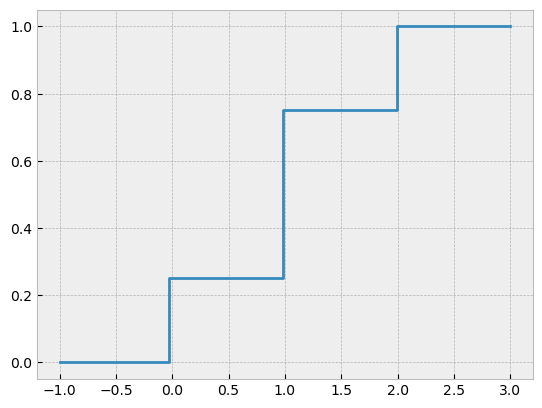

In [23]:
plt.step(x, X.cdf(x))

# Important Discrete RVs

## The Bernoulli Random Variable

An event $A\in\mathcal{F}$ is considered a "success".

* A **Bernoulli RV** $X$ takes two values $0$ and $1$.

* The PMF for a Bernoulli RV $X$ is defined by

$$p_X(x) = P(X=x) = \begin{cases}p,&x=1\\1-p,&x=0\\0,& \text{o.w.}  \end{cases}$$


* We say that the "R.V. $X$ follows a Bernoulli distribution with parameter $p$" and we write this as:

$$X \sim \text{Bernoulli}(p) $$


let's use python to implement a Bernoulli RV. 

In [25]:
B = stats.bernoulli(0.2)

<StemContainer object of 3 artists>

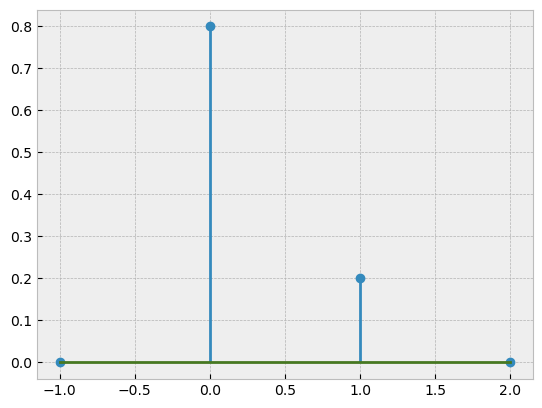

In [27]:
b = range(-1, 3)
plt.stem(b, B.pmf(b))

# Binominal RV


* The PMF of $X$ is given by

$$p_X(x) = P(X=x) = \begin{cases} \binom{n}{x} p^x (1-p)^{n-x}, & x=0,1,\dots,n \\ 0, & \text{o.w.} \end{cases} $$


Let's see how to implement a Binomial RV in Python

In [29]:
Bn0 = stats.binom(20, 0.5) # total number of heads in 20 coin flip with a fair coin

## example: X: the number of heads in 12 flips using a coin with 20% for flipping heads


In [32]:
Bn = stats.binom(12, 0.8)

The complete PMF of this Binomial RV is:

<StemContainer object of 3 artists>

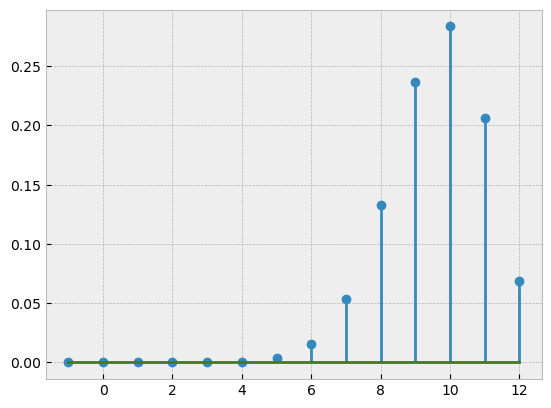

In [33]:
bn = range(-1, 13)
plt.stem(bn, Bn.pmf(bn))

Let's compute $P_X(2)$ where $X \sim \text{Binomial}(12,0.2)$: That is, the probability of 2 heads in 12 flips using this biased coin

Let's plot its CDF:

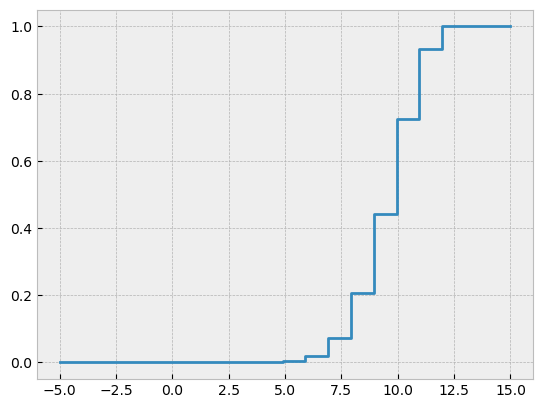

In [34]:
x = np.linspace(-5, 15, 100)
plt.step(x, Bn.cdf(x))

## The Geometric Random Variable

$$P_X(k) = (1-p)^{k-1} p$$

Let's see how to implement a Geometric RV in Python

In [5]:
?stats.geom

In [40]:
G = stats.geom(0.8)

In [41]:
N = 100
samples = G.rvs(size=N)
samples


array([1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 4, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1])

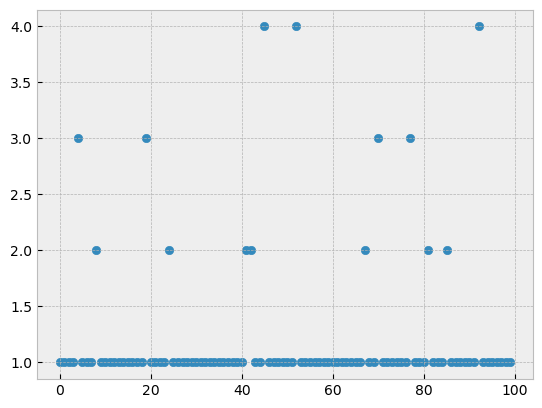

In [42]:
plt.scatter(range(len(samples)), samples)

The complete PMF of this geometric RV is:

Let's plot its CDF:

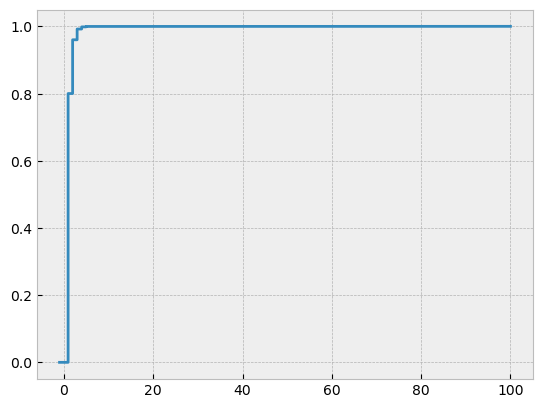

In [45]:
g0= np.linspace(-1, 100, 1000)
plt.step(g0, G.cdf(g0))

* If you flip a fair coin until you see heads, what is the probability that it takes more than 6 flips?

$$P(G>6) = 1- P(G \leq 6) = 1 - F_X(6)$$

<div class="alert alert-info">
    <b>Survival Function</b>
    
If $(\Omega,\mathcal{F},P)$ is a probability space with $X$ a real discrete RV on $\Omega$, the **Survival Function (SF)** is denoted as $S_X(x)$ and provides the probability $P(X > x)$. In particular, for every $x$ we have

$$S_X(x) = P(X > x) = 1 - P(X \leq x) = 1 - F_X(x)$$
</div>

In [46]:
G.sf(6)

6.399999999999996e-05

# Poisson random variable

Consider the random variable $X$: The number of typos in a book of $n$ words:
- each word can be misspelled with a probability $p$.

- Is $X$ :

    a. Bernoulli?
    b. Binomial? 
    c. Geometric RV?
  

- the number of words in a book is large ad the probability of misspelling is small.

We introduce a new RV:


$$X \sim \text{Poisson}(\lambda)$$


* The PMF of the Poisson random variable is:

$$ P_X(x) = \begin{cases} \frac{\lambda^x}{x!} e^{-\lambda}, & x=0,1,\ldots \\ 0, & \mbox{o.w.} \end{cases}
$$

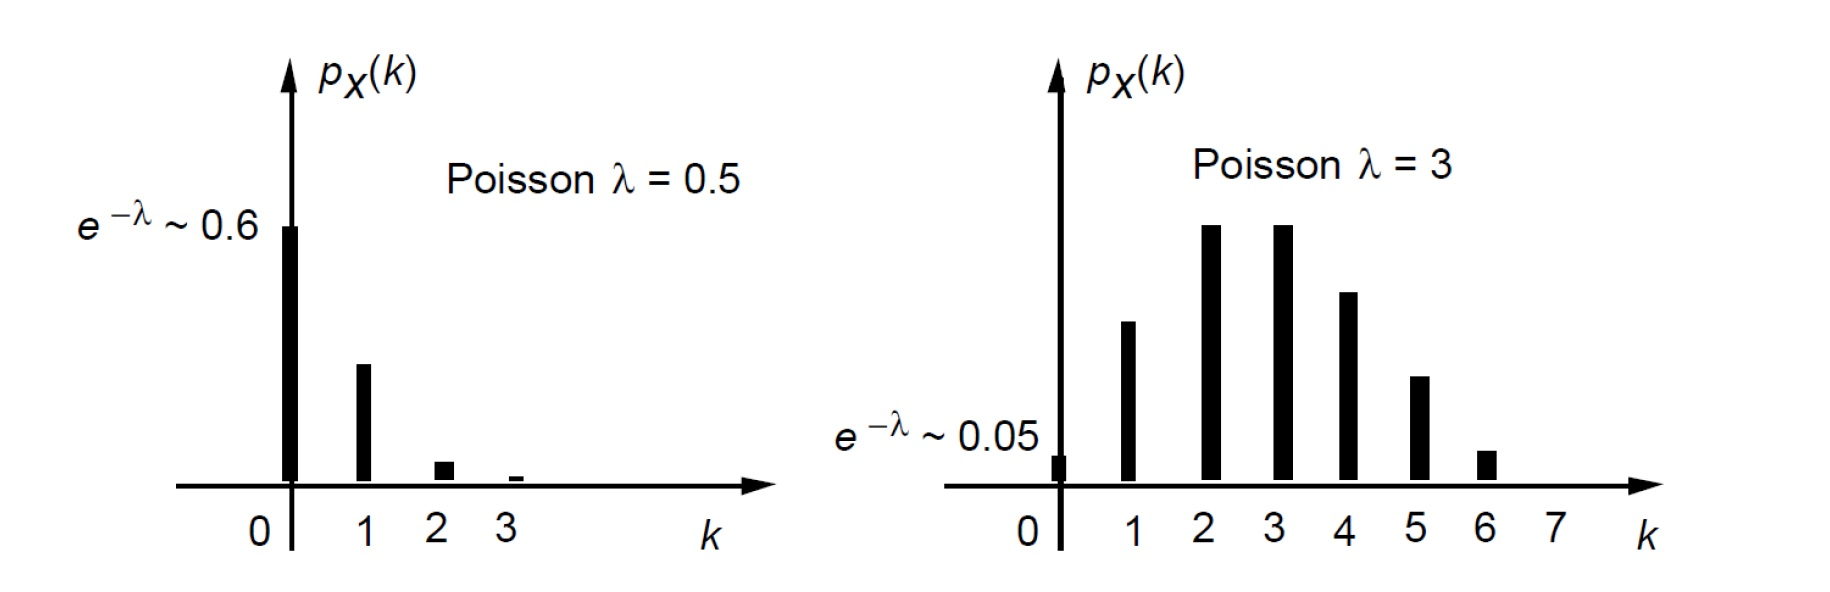

In [2]:
from IPython.display import Image
Image(filename='./poisson.jpg') 

- $\lambda \le 1$, monotonically decreasing.

- $\lambda>1$, first increase and then decrease.

A Poisson RV with parameter $\lambda$ is an approximation of binomial RV with parameter $n\gg 0$ and $p\ll 1$:

$$\lambda = np$$

In [47]:
lmd = 0.5
P = stats.poisson(lmd)

<StemContainer object of 3 artists>

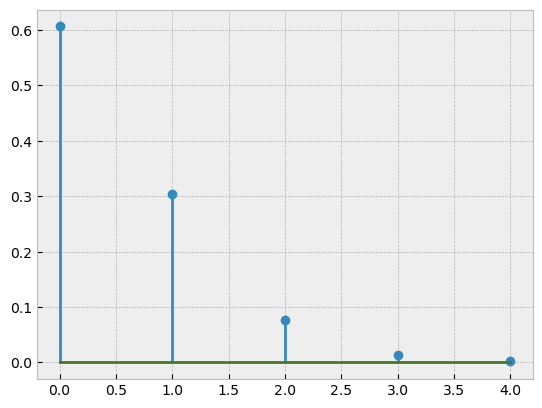

In [48]:
p0= range(5)
plt.stem(p0, P.pmf(p0))

* **Engineering examples/applications:**
    * calls coming in to a switching center
    * packets arriving at a queue in a network
    * processes being submitted to a scheduler

    
* Other examples:
    * \# of misprints on a group of pages in a book
    * \# of people in a community that live to be 100 years old
    * \# of wrong telephone numbers that are dialed in a day
    * \# of $\alpha$-particles discharged in a fixed period of time from some radioactive material
    * \# of earthquakes per year
    * \# of computer crashes in a lab in a week

## Example  

**An engineering professor makes an average of 60 mistakes during lectures over the course of a typical semester. A semester consists of 40 lectures, each of which is 50 minutes long.**

**<font color=blue>Question 1</font> In a new semester, what is the probability that the professor makes at least one mistake during some 20 minute period?**

In [52]:
p_mistake =  60/(40*50)# mistake per minute
p_mistake
Bm = stats.binom(20, p_mistake)
Bm.sf(1)

0.11983802227320284

In [53]:
# poisson
lma1 = 20*p_mistake # np
lma1

0.6

In [55]:
P0 = stats.poisson(lma1)
P0.sf(1)

0.12190138224955764

**<font color=blue>Question 2</font> What is the probability that the professor makes 4 mistakes in a lecture?**

In [56]:
lma2 = 50*p_mistake # np
P1 = stats.poisson(lma2)
P1.pmf(4)

0.04706651815630941

**<font color=blue>Question 3</font> What is the probability that the professor makes less or equal than 4 mistakes in a lecture?**

$$P(Y\leq 4) = F_Y(4)$$

In [57]:
P1.cdf(4)

0.9814240637778593

**<font color=blue>Question 4</font> What is the probability that the professor has at least one lecture with 4 or more mistakes in a semester?**

In [59]:
# Event: in a lecture has 4 or more mistakes
p_e = 1- P1.cdf(4)
# binomial random variable
Z = stats.binom(40, p_e)
Z.sf(0)

0.5276454599531294

## Example: Bayesian Hypothesis Testing + Discrete Random Variables 

Let’s consider a scenario where we use Bayesian hypothesis testing to determine whether a coin is fair ($H_0$) or biased ($H_1$) based on observed flips.

- $H_0$: A fair coin.

- $H_1$: A biased coin with a probability of heads being 0.7

A randomly picked coin from a pile can be fair with probability 0.6, and biased with probability 0.4

*Observation*: We observed 16 heads out of 20 coin flip. Decide if the coin is biased or fair?

## Step 1: Define the prior distribution

## Step 2: Calculating the likelihood of observation under two hypotheses

## Step 3: Computing the Posterior 

## Step 4: Using MAP rule for decision